Richa Patel
Final Project - Research Report

# Rhode Island Police and local Weather data

In [1]:
import pandas as pd
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style="white", color_codes=True)


figsize = (16,8)

# read file for police and weather Data

police = pd.read_csv('police.csv')
print(police)

#we can see that we have 91741 rows and 15 columns

weather = pd.read_csv('weather.csv')
print(weather)

# [4017 rows x 27 columns]

print(police.describe())
police.info()

print(weather.describe())
weather.info()

police['district'].value_counts()


      state   stop_date stop_time  county_name driver_gender driver_race  \
0        RI  2005-01-04     12:55          NaN             M       White   
1        RI  2005-01-23     23:15          NaN             M       White   
2        RI  2005-02-17     04:15          NaN             M       White   
3        RI  2005-02-20     17:15          NaN             M       White   
4        RI  2005-02-24     01:20          NaN             F       White   
...     ...         ...       ...          ...           ...         ...   
91736    RI  2015-12-31     21:21          NaN             F       Black   
91737    RI  2015-12-31     21:59          NaN             F       White   
91738    RI  2015-12-31     22:04          NaN             M       White   
91739    RI  2015-12-31     22:09          NaN             F    Hispanic   
91740    RI  2015-12-31     22:47          NaN             M       White   

                        violation_raw            violation  search_conducted  \
0      

Zone X4    24279
Zone K3    20405
Zone K2    18397
Zone X3    17013
Zone K1     8678
Zone X1     2969
Name: district, dtype: int64

# List of all county name

In [2]:
police['county_name'].value_counts()

Series([], Name: county_name, dtype: int64)

As above There is no any county name display here

In [3]:
police['violation_raw'].value_counts()

Speeding                            48424
Other Traffic Violation             16224
Equipment/Inspection Violation      10922
Registration Violation               3703
Seatbelt Violation                   2856
Special Detail/Directed Patrol       2467
Call for Service                     1392
Motorist Assist/Courtesy              205
Violation of City/Town Ordinance      181
APB                                    91
Suspicious Person                      56
Warrant                                18
Name: violation_raw, dtype: int64

Top most reason for violation is Speeding and least reson is Seat Belt.

In [4]:
police['violation'].value_counts()

Speeding               48424
Moving violation       16224
Equipment              10922
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [5]:
police['stop_outcome'].value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

We can see citation has high value.

In [6]:
police['driver_gender'].value_counts()

M    62762
F    23774
Name: driver_gender, dtype: int64

Male is stopped than Female.

In [7]:
police['driver_race'].value_counts()

White       61872
Black       12285
Hispanic     9727
Asian        2390
Other         265
Name: driver_race, dtype: int64

There's no bias here for pulling over non-white drivers vs white drivers but other race is less stopped by.

In [8]:
police[["stop_date", "stop_time"]].head()

,stop_date,stop_time
0,2005-01-04,12:55
1,2005-01-23,23:15
2,2005-02-17,04:15
3,2005-02-20,17:15
4,2005-02-24,01:20


In [9]:
police["is_arrested"] = police.is_arrested.astype("bool")
dt_index = police.stop_date.str.cat(police.stop_time, sep = " ")
police["stop_datetime"] = pd.to_datetime(dt_index)

police_cleaned = (police.
  drop(["county_name", "state"], axis = "columns").
  dropna(subset = ["driver_gender", "driver_race"]).
  set_index("stop_datetime")
)

police_cleaned.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [10]:
police_cleaned.search_conducted.head()

stop_datetime
2005-01-04 12:55:00    False
2005-01-23 23:15:00    False
2005-02-17 04:15:00    False
2005-02-20 17:15:00    False
2005-02-24 01:20:00    False
Name: search_conducted, dtype: bool

We can break the average search rate by gender

In [11]:
police_cleaned.groupby("driver_gender").search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [12]:
police_cleaned.groupby(["violation", "driver_gender"]).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [13]:
condition = police_cleaned.driver_race.isin(["White", "Black", "Hispanic", "Asian"]) & police_cleaned.search_type.isin(["Incident to Arrest", 'Probable Cause', 'Inventory'])

search_type_by_race = (police_cleaned[condition].
  groupby("driver_race").
  search_type.
  value_counts(normalize = True).
  unstack()
)

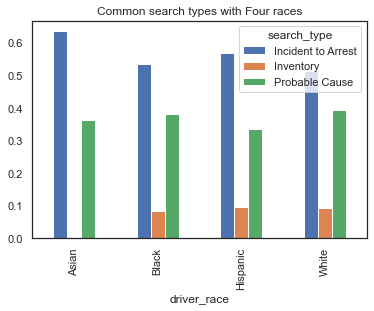

In [14]:
import matplotlib.pyplot as plt
search_type_by_race.plot(kind = "bar")
plt.title("Common search types with Four races")
plt.show()

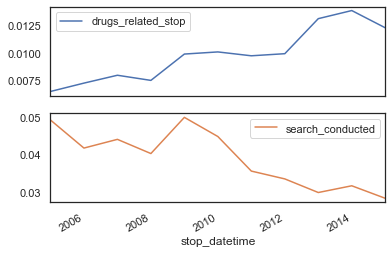

In [106]:
drug_rate = police_cleaned.drugs_related_stop.resample("A").mean()
search_rate = police_cleaned.search_conducted.resample("A").mean()
annual = pd.concat([drug_rate, search_rate], axis="columns")
annual.plot(subplots = True)
plt.show()

Distributation all the violation

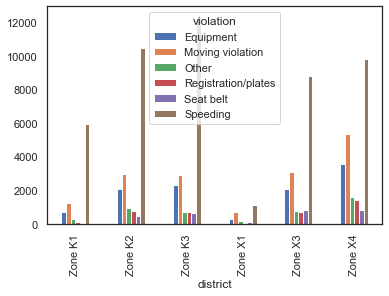

In [15]:
all_zone = pd.crosstab(police_cleaned.district, police_cleaned.violation)
all_zone.plot(kind = 'bar')
plt.show()

# Let's create function 

In [16]:
def outcome_stats(df):
    total = len(df)
    warnings = len(df[df['stop_outcome'] == 'Warning'])
    citations = len(df[df['stop_outcome'] == 'Citation'])
    arrests = len(df[df['stop_outcome'] == 'Arrest Driver'])
    citations_per_warning = citations / warnings
    arrest_rate = arrests / total
    
    return(pd.Series(data = { 
        'total': total,
        'warnings': warnings,
        'citations': citations,
        'arrests': arrests,
        'citations per warning': citations_per_warning,
        'arrest rate': arrest_rate
    }))

In [17]:
outcome_stats(police)

total                    91741.000000
warnings                  5137.000000
citations                77092.000000
arrests                   2735.000000
citations per warning       15.007203
arrest rate                  0.029812
dtype: float64

In [18]:
police.groupby('driver_gender').apply(outcome_stats)


,total,warnings,citations,arrests,citations per warning,arrest rate
driver_gender,,,,,,
F,23774.0,1485.0,21251.0,556.0,14.310438,0.023387
M,62762.0,3651.0,55840.0,2179.0,15.294440,0.034718


In [19]:
police.groupby('driver_race').apply(compute_outcome_stats)

NameError: name 'compute_outcome_stats' is not defined

In [20]:
police.groupby(['violation']).apply(compute_outcome_stats)



NameError: name 'compute_outcome_stats' is not defined

# #Analyzing the effect of weather on policing

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


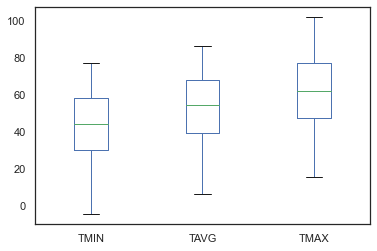

In [21]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind = 'box')

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


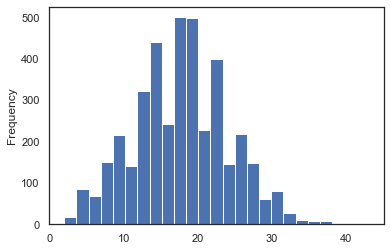

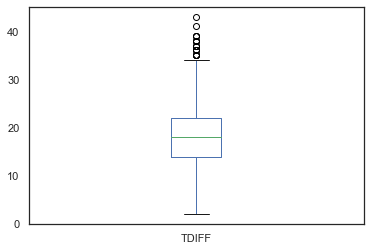

In [22]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind = 'hist', bins = 25)

# Create a box plot of the temperature columns
weather[['TDIFF']].plot(kind = 'box')

# Display the plot
plt.show()

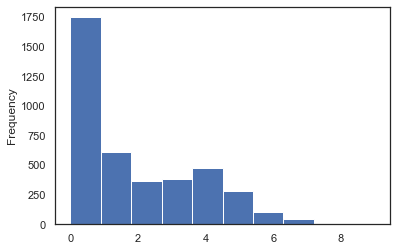

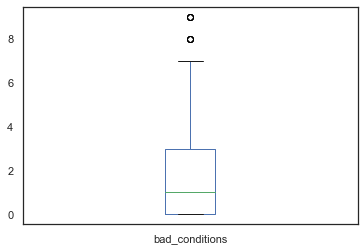

In [23]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WTTest = weather.loc[:, 'WT01' : 'WT22']

weather['bad_conditions'] = WTTest.sum(axis = 'columns')

# Replace the missing values in 'bad_conditions' with 0
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind = 'hist')

# Create a box plot of the bad conditions columns
weather[['bad_conditions']].plot(kind = 'box')

plt.show()

In [24]:

print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mappings = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse'}

# Convert the bad_conditions integers to string
weather['rating'] = weather.bad_conditions.map(mappings)

# Count the unique values in rating
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     428
Name: rating, dtype: int64
